# **Import Libraries**

In [1]:
!pip install tensorflow==2.18.1
!pip install mediapipe
!pip install neurite@git+https://github.com/adalca/neurite.git@40c6d0e277b12dc9dddb6e76f2dbdd373b7d22b1
!pip install voxelmorph@git+https://github.com/voxelmorph/voxelmorph.git@923a37d51b0c8d93eb576156c07ecb25c2a4e730


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 20.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 23.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 5.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2

[notice] A new release of pip is available: 23.0.1 ->

In [2]:
import tensorflow as tf
import voxelmorph as vxm
import matplotlib.pyplot as plt
import numpy as np
import cv2
from zipfile import ZipFile
import os
import time

E0000 00:00:1755933854.118738      10 common_lib.cc:612] Could not set metric server port: INVALID_ARGUMENT: Could not find SliceBuilder port 8471 in any of the 0 ports provided in `tpu_process_addresses`="local"
=== Source Location Trace: === 
learning/45eac/tfrc/runtime/common_lib.cc:230
/usr/local/lib/python3.10/site-packages/neurite/__init__.py:33: FutureWarning: The default backend will soon be changing to 'pytorch'. If you prefer to use TensorFlow, please set the NEURITE_BACKEND environment variable to 'tensorflow'.
  backend = py.utils.get_backend()


In [3]:
if len(tf.config.list_logical_devices('TPU')) > 0 :
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='local')
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
elif len(tf.config.list_logical_devices('GPU')) > 0 :
    gpus = tf.config.list_logical_devices('GPU')
    strategy = tf.distribute.MirroredStrategy(gpus)
else :
    pass

I0000 00:00:1755933874.172752      10 service.cc:148] XLA service 0x5cd0a4174fe0 initialized for platform TPU (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755933874.172796      10 service.cc:156]   StreamExecutor device (0): TPU, 2a886c8
I0000 00:00:1755933874.172801      10 service.cc:156]   StreamExecutor device (1): TPU, 2a886c8
I0000 00:00:1755933874.172804      10 service.cc:156]   StreamExecutor device (2): TPU, 2a886c8
I0000 00:00:1755933874.172807      10 service.cc:156]   StreamExecutor device (3): TPU, 2a886c8
I0000 00:00:1755933874.172810      10 service.cc:156]   StreamExecutor device (4): TPU, 2a886c8
I0000 00:00:1755933874.172813      10 service.cc:156]   StreamExecutor device (5): TPU, 2a886c8
I0000 00:00:1755933874.172815      10 service.cc:156]   StreamExecutor device (6): TPU, 2a886c8
I0000 00:00:1755933874.172818      10 service.cc:156]   StreamExecutor device (7): TPU, 2a886c8


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [4]:
BATCH_SIZE = 8
IMAGE_SIZE = (256, 192)

# **Import Data**

In [6]:
train_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-agnostic-v3.2',
                                                                   labels=None,
                                                                   image_size=IMAGE_SIZE,
                                                                   batch_size=None,
                                                                   shuffle=False,
                                                                   subset='training',
                                                                   validation_split=0.12,
                                                                  )
val_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-agnostic-v3.2',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='validation',
                                                                 validation_split=0.12,
                                                                )
test_agnostic_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-agnostic-v3.2',
                                                                  labels=None,
                                                                  image_size=IMAGE_SIZE,
                                                                  batch_size=None,
                                                                  shuffle=False)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [7]:
train_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-v3',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='training',
                                                          validation_split=0.12,
                                                         )
val_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image-parse-v3',
                                                        labels=None,
                                                        image_size=IMAGE_SIZE,
                                                        batch_size=None,
                                                        shuffle=False,
                                                        subset='validation',
                                                        validation_split=0.12,
                                                       )
test_parse = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-v3',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False
                                                        )

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [8]:
train_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image',
                                                           labels=None,
                                                           image_size=IMAGE_SIZE,
                                                           batch_size=None,
                                                           shuffle=False,
                                                           subset='training',
                                                           validation_split=0.12,
                                                          ).map(lambda x: x / 255)
val_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/image',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False,
                                                         subset='validation',
                                                         validation_split=0.12,
                                                        ).map(lambda x: x / 255)
test_images = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/image',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False).map(lambda x: x / 255)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


In [9]:
train_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth',
                                                            labels=None,
                                                            image_size=IMAGE_SIZE,
                                                            batch_size=None,
                                                            shuffle=False,
                                                            subset='training',
                                                            validation_split=0.12,
                                                           ).map(lambda x: x / 255)
val_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth',
                                                          labels=None,
                                                          image_size=IMAGE_SIZE,
                                                          batch_size=None,
                                                          shuffle=False,
                                                          subset='validation',
                                                          validation_split=0.12,
                                                         ).map(lambda x: x / 255)
test_clothes = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth',
                                                         labels=None,
                                                         image_size=IMAGE_SIZE,
                                                         batch_size=None,
                                                         shuffle=False).map(lambda x: x / 255)

train_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth-mask',
                                                                 labels=None,
                                                                 image_size=IMAGE_SIZE,
                                                                 batch_size=None,
                                                                 shuffle=False,
                                                                 subset='training',
                                                                 validation_split=0.12,
                                                                )
val_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/train/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False,
                                                               subset='validation',
                                                               validation_split=0.12,
                                                              )
test_clothes_mask = tf.keras.utils.image_dataset_from_directory('/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth-mask',
                                                               labels=None,
                                                               image_size=IMAGE_SIZE,
                                                               batch_size=None,
                                                               shuffle=False)

Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.
Found 11647 files.
Using 10250 files for training.
Found 11647 files.
Using 1397 files for validation.
Found 2032 files.


# **Data Preprocessing**

## Clothes Mask

In [10]:
def threshold_clothes_mask(image) :
    image = tf.reduce_mean(image, axis=-1)
    mask = tf.where(image > 127, 1.0, 0.0)
    mask = tf.expand_dims(mask, axis=-1)
    return mask

In [11]:
train_clothes_mask = train_clothes_mask.map(threshold_clothes_mask)
val_clothes_mask = val_clothes_mask.map(threshold_clothes_mask)
test_clothes_mask = test_clothes_mask.map(threshold_clothes_mask)

## Extract Clothes from Person

In [12]:
def extract_clothes(image, mask) :
    cloth_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([254, 85, 0], dtype=tf.float32)),
                               axis=-1)
    dress_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([0, 0, 85], dtype=tf.float32)),
                               axis=-1)
    coat_mask = tf.reduce_all(tf.equal(mask,
                                        tf.constant([0, 119, 220], dtype=tf.float32)),
                               axis=-1)
    cloth_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(cloth_mask), axis=-1), tf.float32)
    dress_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(dress_mask), axis=-1), tf.float32)
    coat_mask_inv = tf.cast(tf.expand_dims(tf.logical_not(coat_mask), axis=-1), tf.float32)
    background = (cloth_mask_inv * dress_mask_inv * coat_mask_inv) * (246 / 255)

    cloth_mask = tf.cast(tf.expand_dims(cloth_mask, axis=-1), tf.float32)
    dress_mask = tf.cast(tf.expand_dims(dress_mask, axis=-1), tf.float32)
    coat_mask = tf.cast(tf.expand_dims(coat_mask, axis=-1), tf.float32)
    mask = cloth_mask + dress_mask + coat_mask

    masked_image = tf.multiply(image, mask) + background
    return masked_image

In [13]:
train_warped_clothes = tf.data.Dataset.zip(train_images, train_parse).map(lambda x, y: extract_clothes(x, y))
val_warped_clothes = tf.data.Dataset.zip(val_images, val_parse).map(lambda x, y: extract_clothes(x, y))
test_warped_clothes = tf.data.Dataset.zip(test_images, test_parse).map(lambda x, y: extract_clothes(x, y))

## Create Pose Skeleton from MediaPipe

In [14]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [15]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(image_size, detection_result, image=None):
    pose_landmarks_list = detection_result.pose_landmarks
    if image is None :
        canvas = np.zeros(image_size)
    else :
        canvas = np.copy(image)

    # Loop through the detected poses to visualize.
    for idx in range(len(pose_landmarks_list)):
        pose_landmarks = pose_landmarks_list[idx]

        # Draw the pose landmarks.
        pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
        pose_landmarks_proto.landmark.extend([
          landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
        ])
        solutions.drawing_utils.draw_landmarks(
          canvas,
          pose_landmarks_proto,
          solutions.pose.POSE_CONNECTIONS,
          solutions.drawing_styles.get_default_pose_landmarks_style())
    return canvas

In [16]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options
)
detector = vision.PoseLandmarker.create_from_options(options)

I0000 00:00:1755934076.119202      10 task_runner.cc:85] GPU suport is not available: INTERNAL: ; RET_CHECK failure (mediapipe/gpu/gl_context_egl.cc:77) display != EGL_NO_DISPLAYeglGetDisplay() returned error 0x300c
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1755934076.225298    3076 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1755934076.406632    3076 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [17]:
def apply_mediapipe(tensor) :
    def process(input_) :
        input_int = (input_.numpy() * 255).astype(np.uint8)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=input_int)
        detection_result = detector.detect(mp_image)
        landmark = draw_landmarks_on_image(input_int.shape, detection_result)
        landmark = np.expand_dims(np.mean(landmark, axis=-1), axis=-1)
        return np.array(landmark, dtype=np.float32) / 255
    return tf.py_function(process, [tensor], tf.float32)

In [18]:
train_landmark = train_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
val_landmark = val_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
test_landmark = test_images.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))

## Combine (Multiply) Person Images and the Agnostic Parse

In [19]:
def filter_clothes(image, mask) :
    mask = tf.reduce_all(tf.equal(mask, tf.constant([0, 0, 0], dtype=tf.float32)), axis=-1)
    mask = tf.cast(tf.expand_dims(tf.logical_not(mask), axis=-1), tf.float32)
    image_masked = tf.multiply(image, mask)
    return image_masked

In [20]:
train_images_agnostic = tf.data.Dataset.zip(train_images, train_agnostic_parse).map(lambda x, y: filter_clothes(x, y))
val_images_agnostic = tf.data.Dataset.zip(val_images, val_agnostic_parse).map(lambda x, y: filter_clothes(x, y))
test_images_agnostic = tf.data.Dataset.zip(test_images, test_agnostic_parse).map(lambda x, y: filter_clothes(x, y))

## Zip All Inputs and the Images

In [21]:
train_datasets = tf.data.Dataset.zip(tf.data.Dataset.zip(train_images_agnostic,
                                                         train_landmark,
                                                         train_clothes,
                                                         train_clothes_mask),
                                     tf.data.Dataset.zip(train_warped_clothes, train_images)
                                    ).cache().shuffle(BATCH_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
train_dist_data = strategy.experimental_distribute_dataset(train_datasets)

val_datasets = tf.data.Dataset.zip(tf.data.Dataset.zip(val_images_agnostic,
                                                       val_landmark,
                                                       val_clothes,
                                                       val_clothes_mask),
                                   tf.data.Dataset.zip(val_warped_clothes, val_images)
                                  ).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dist_data = strategy.experimental_distribute_dataset(val_datasets)

test_datasets = tf.data.Dataset.zip(tf.data.Dataset.zip(test_images_agnostic,
                                                        test_landmark,
                                                        test_clothes,
                                                        test_clothes_mask),
                                    tf.data.Dataset.zip(test_warped_clothes, test_images)
                                   ).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dist_data = strategy.experimental_distribute_dataset(test_datasets)

# **Modelling**

In [22]:
def UNet(input_shape,
         inputs=None,
         initial_filter=64,
         min_latent_dim=4,
         output_channel=3,
         output_activation='relu',
         encoder_conv_num=1,
         bottleneck_conv_num=3,
         bottleneck_filter_num=512,
         decoder_conv_num=1,
         use_upsample=True,
         use_pooling=True,
         use_instance_norm=False,
         use_leaky_relu=False,
         show_summary=True,
         model_name="attention_unet"
        ) :
    block_outputs = []
    block_filters = []
    min_dim = min(input_shape[:2])

    if inputs is None :
        input_layer = tf.keras.Input(shape=input_shape)
    else :
        input_layer = tf.keras.layers.Concatenate(name='concat_inputs')(inputs)

    # Encoder
    counter = 0
    factor = 1
    prev_layer = input_layer

    while min_dim >= min_latent_dim :
        if len(block_outputs) > 0 :
            if use_pooling :
                downsample = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(block_outputs[-1])
            else :
                downsample = tf.keras.layers.Conv2D(filters=initial_filter*factor,
                                                 kernel_size=(3, 3),
                                                 strides=2,
                                                 padding='same')(block_outputs[-1])
            prev_layer = downsample

        if counter == 2 :
            factor *= 2
            counter = 0

        for i in range(encoder_conv_num) :
            conv = tf.keras.layers.Conv2D(filters=initial_filter*factor,
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = tf.keras.layers.BatchNormalization()(conv)
            else :
                norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = tf.keras.layers.ReLU()(norm)
            else :
                relu = tf.keras.layers.LeakyReLU()(norm)
            prev_layer = relu

        block_outputs.append(relu)
        block_filters.append(initial_filter*factor)

        counter += 1
        if min_dim % 2 == 0 :
            min_dim /= 2
        else :
            break

    # Bottleneck
    for _ in range(bottleneck_conv_num) :

        conv = tf.keras.layers.Conv2D(filters=bottleneck_filter_num,
                                   kernel_size=(3, 3),
                                   padding='same')(prev_layer)
        if not use_instance_norm :
            norm = tf.keras.layers.BatchNormalization()(conv)
        else :
            norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

        if not use_leaky_relu :
            relu = tf.keras.layers.ReLU()(norm)
        else :
            relu = tf.keras.layers.LeakyReLU()(norm)
        prev_layer = relu

    # Decoder
    output_idx = len(block_outputs) - 1
    counter = 0
    if factor > 1 :
        factor /= 2

    while output_idx > 0 :
        if not use_upsample :
            upsize_layer = tf.keras.layers.Conv2DTranspose(filters=block_filters[output_idx-1],
                                                        kernel_size=(2, 2),
                                                        strides=2)(prev_layer)
        else :
            upsize_layer = tf.keras.layers.UpSampling2D(size=(2, 2), interpolation='bilinear')(prev_layer)

        if not use_instance_norm :
            norm = tf.keras.layers.BatchNormalization()(upsize_layer)
        else :
            norm = tf.keras.layers.GroupNormalization(groups=-1)(upsize_layer)

        if not use_leaky_relu :
            relu = tf.keras.layers.ReLU()(norm)
        else :
            relu = tf.keras.layers.LeakyReLU()(norm)

        # Attention block
        conv_w_encoder = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(block_outputs[output_idx-1])
        if not use_instance_norm :
            norm_w_encoder = tf.keras.layers.BatchNormalization()(conv_w_encoder)
        else :
            norm_w_encoder = tf.keras.layers.GroupNormalization(groups=-1)(conv_w_encoder)

        conv_w_decoder = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                               kernel_size=(1, 1),
                                               padding='same')(relu)

        if not use_instance_norm :
            norm_w_decoder = tf.keras.layers.BatchNormalization()(conv_w_decoder)
        else :
            norm_w_decoder = tf.keras.layers.GroupNormalization(groups=-1)(conv_w_decoder)

        w_add = tf.keras.layers.Add()([norm_w_encoder, norm_w_decoder])

        if not use_leaky_relu :
            w_relu = tf.keras.layers.ReLU()(w_add)
        else :
            w_relu = tf.keras.layers.LeakyReLU()(w_add)

        w_output = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(1, 1),
                                       padding='same',
                                       activation='sigmoid')(w_relu)
        att_output = tf.keras.layers.Multiply()([w_output, block_outputs[output_idx-1]])

        # Concatenate
        concat = tf.keras.layers.Concatenate()([relu, att_output])
        prev_layer = concat

        for _ in range(decoder_conv_num) :
            conv = tf.keras.layers.Conv2D(filters=block_filters[output_idx-1],
                                       kernel_size=(3, 3),
                                       padding='same')(prev_layer)
            if not use_instance_norm :
                norm = tf.keras.layers.BatchNormalization()(conv)
            else :
                norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)

            if not use_leaky_relu :
                relu = tf.keras.layers.ReLU()(norm)
            else :
                relu = tf.keras.layers.LeakyReLU()(norm)

            prev_layer = relu

        output_idx -= 1

    output = tf.keras.layers.Conv2D(filters=output_channel,
                                 kernel_size=(1, 1),
                                 activation=output_activation,
                                 padding='same')(prev_layer)

    if inputs is None :
        model = tf.keras.Model(inputs=input_layer, outputs=output, name=model_name)
    else :
        model = tf.keras.Model(inputs=inputs, outputs=output, name=model_name)

    if show_summary :
        model.summary()

    return model

## Define Generator and Discriminator Loss

In [23]:
def load_vgg19() :
    vgg19 = tf.keras.applications.VGG19(weights='imagenet',
                                        input_shape=(*IMAGE_SIZE, 3),
                                        include_top=False)
    vgg19 = tf.keras.models.Model(inputs=vgg19.input,
                                  outputs=vgg19.get_layer('block4_conv4').output)
    vgg19.trainable = False
    return vgg19

In [24]:
def load_losses_object() :
    mse_loss = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
    mae_loss = tf.keras.losses.MeanAbsoluteError(reduction=tf.keras.losses.Reduction.NONE)

    return mse_loss, mae_loss

In [25]:
with strategy.scope() :
    vgg19 = load_vgg19()
    mse, l1 = load_losses_object()

I0000 00:00:1755934077.032692      10 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
def compute_vgg_loss(real_images, fake_images) :
    real_images = tf.keras.applications.vgg19.preprocess_input(tf.cast(real_images, dtype=tf.float32) * 255.0)
    fake_images = tf.keras.applications.vgg19.preprocess_input(tf.cast(fake_images, dtype=tf.float32) * 255.0)
    vgg_real = vgg19(real_images, training=False)
    vgg_fake = vgg19(fake_images, training=False)

    per_example_vgg_loss = l1(vgg_real, vgg_fake)
    per_example_vgg_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_vgg_loss)[1:]), tf.float32)
    vgg_loss = tf.nn.compute_average_loss(per_example_vgg_loss)

    return vgg_loss

In [27]:
def compute_l1_loss(real_images, fake_images) :
    per_example_l1_loss = l1(real_images, fake_images)
    per_example_l1_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_l1_loss)[1:]), tf.float32)
    l1_loss = tf.nn.compute_average_loss(per_example_l1_loss)

    return l1_loss

In [28]:
def generator_loss(discriminator_fake_output, generator_output, real_images) :
    per_example_gan_loss = mse(tf.ones_like(discriminator_fake_output), discriminator_fake_output)
    per_example_gan_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_gan_loss)[1:]), tf.float32)
    gan_loss = tf.nn.compute_average_loss(per_example_gan_loss)

    l1_loss = compute_l1_loss(real_images, generator_output)

    vgg_loss = compute_vgg_loss(real_images, generator_output)

    total_loss = 10 * gan_loss + 0.1 * vgg_loss + 20 * l1_loss
    return total_loss, gan_loss, vgg_loss, l1_loss

In [29]:
def discriminator_loss(discriminator_real_output, discriminator_fake_output) :
    per_example_fake_loss = mse(tf.zeros_like(discriminator_fake_output), discriminator_fake_output)
    per_example_fake_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_fake_loss)[1:]), tf.float32)
    fake_loss = tf.nn.compute_average_loss(per_example_fake_loss)

    per_example_real_loss = mse(tf.ones_like(discriminator_real_output), discriminator_real_output)
    per_example_real_loss /= tf.cast(tf.reduce_prod(tf.shape(per_example_real_loss)[1:]), tf.float32)
    real_loss = tf.nn.compute_average_loss(per_example_real_loss)

    discriminator_loss = (fake_loss + real_loss) / 2
    return discriminator_loss

## Define Generator

In [30]:
def load_unet(inputs,
              initial_filter=64,
              min_latent_dim=2,
              encoder_conv_num=3,
              bottleneck_conv_num=3,
              decoder_conv_num=3,
              output_channel=3,
              output_activation='relu',
              model_name="attention_unet") :

    input_channels = sum([input.shape[-1] for input in inputs])
    generator = UNet(input_shape=(*IMAGE_SIZE, input_channels),
                     inputs=inputs,
                     initial_filter=initial_filter,
                     min_latent_dim=min_latent_dim,
                     output_channel=output_channel,
                     output_activation=output_activation,
                     encoder_conv_num=encoder_conv_num,
                     bottleneck_conv_num=bottleneck_conv_num,
                     decoder_conv_num=decoder_conv_num,
                     use_pooling=False,
                     use_instance_norm=True,
                     use_leaky_relu=True,
                     show_summary=False,
                     model_name=model_name)
    return generator

## Define Discriminator

In [31]:
def load_discriminator(initial_filter=32, num_conv=4) :
    image_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    agnostic_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    pose_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    concat_input = tf.keras.layers.Concatenate()([image_input, agnostic_input, pose_input])

    prev_layer = concat_input

    for i in range(num_conv) :
        conv = tf.keras.layers.Conv2D(filters=initial_filter*2**i,
                                      kernel_size=(3, 3),
                                      padding='same',
                                      strides=2)(prev_layer)
        norm = tf.keras.layers.GroupNormalization(groups=-1)(conv)
        lrelu = tf.keras.layers.LeakyReLU()(norm)
        dropout = tf.keras.layers.Dropout(0.2)(lrelu)

        prev_layer = dropout

    output = tf.keras.layers.Conv2D(filters=1,
                                    kernel_size=(3, 3),
                                    padding='same',
                                    activation='linear')(prev_layer)
    discriminator = tf.keras.Model(inputs=[image_input, agnostic_input, pose_input], outputs=output)

    return discriminator

# **Training**

In [33]:
with strategy.scope() :
    person_agnostic_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    skeleton_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    cloth_input = tf.keras.Input(shape=(*IMAGE_SIZE, 3))
    cloth_mask_input = tf.keras.Input(shape=(*IMAGE_SIZE, 1))
    concat_inputs = [person_agnostic_input, skeleton_input, cloth_input, cloth_mask_input]

    warp_unet = load_unet(inputs=concat_inputs,
                          output_channel=2,
                          output_activation='linear')

    spatial_transformer = vxm.layers.SpatialTransformer()([cloth_input, warp_unet.output])
    warp_model = tf.keras.Model(inputs=concat_inputs,
                                    outputs=[person_agnostic_input, skeleton_input, spatial_transformer],
                                    name='warp_model')

    tryon_generator = load_unet(inputs=warp_unet.input[:2]+[spatial_transformer],
                                output_activation='sigmoid',
                                model_name="tryon_generator")

    discriminator = load_discriminator(initial_filter=64, num_conv=5)

In [34]:
with strategy.scope() :
    gen_optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    disc_optimizer = tf.keras.optimizers.Adam(learning_rate=2e-4)

## Training Try On Generator

In [35]:
warp_model.load_weights("warp_model_best.weights.h5")
warp_model.trainable = False

In [37]:
def generator_train_step(inputs, real_images) :
    with tf.GradientTape() as gen_tape :
        warp_outputs = warp_model(inputs)
        fake_images = tryon_generator(warp_outputs, training=True)
        discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=False)

        total_loss, gan_loss, vgg_loss, l1_loss = generator_loss(discriminator_fake_output,
                                                                 fake_images,
                                                                 real_images)

    generator_gradients = gen_tape.gradient(total_loss, tryon_generator.trainable_variables)
    gen_optimizer.apply_gradients(zip(generator_gradients, tryon_generator.trainable_variables))

    return total_loss, gan_loss, vgg_loss, l1_loss

@tf.function
def distributed_generator_train_step(inputs, real_images):
    losses = strategy.run(generator_train_step, args=(inputs, real_images))
    per_replica_total_loss, per_replica_gan_loss, per_replica_vgg_loss, per_replica_l1_loss = losses

    total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_total_loss, axis=None)
    gan_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_gan_loss, axis=None)
    vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_vgg_loss, axis=None)
    l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_l1_loss, axis=None)

    return total_loss, gan_loss, vgg_loss, l1_loss

In [38]:
def disc_train_step(inputs, real_images) :
    with tf.GradientTape() as disc_tape :
        warp_outputs = warp_model(inputs)
        fake_images = tryon_generator(warp_outputs, training=False)

        discriminator_real_output = discriminator((real_images, inputs[0], inputs[1]), training=True)
        discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=True)

        disc_loss = discriminator_loss(discriminator_real_output, discriminator_fake_output)

    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    disc_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

    return disc_loss

@tf.function
def distributed_disc_train_step(inputs, real_images) :
    per_replica_disc_loss = strategy.run(disc_train_step, args=(inputs, real_images))
    total_disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_disc_loss, axis=None)

    return total_disc_loss

In [39]:
def val_step(inputs, real_images) :
    warp_outputs = warp_model(inputs)
    fake_images = tryon_generator(warp_outputs, training=False)

    discriminator_real_output = discriminator((real_images, inputs[0], inputs[1]), training=False)
    discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=False)

    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss = generator_loss(discriminator_fake_output,
                                                                             fake_images,
                                                                             real_images)

    val_disc_loss = discriminator_loss(discriminator_real_output, discriminator_fake_output)

    return val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss

@tf.function
def distributed_val_step(inputs, real_images):
    val_losses = strategy.run(val_step, args=(inputs, real_images))

    val_per_replica_total_loss, val_per_replica_gan_loss, val_per_replica_vgg_loss, val_per_replica_l1_loss, val_per_replica_discriminator_loss = val_losses

    val_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_total_loss, axis=None)
    val_gan_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_gan_loss, axis=None)
    val_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_vgg_loss, axis=None)
    val_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_l1_loss, axis=None)
    val_disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, val_per_replica_discriminator_loss, axis=None)

    return val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss

In [40]:
EPOCHS = 25
PREVIOUS_EPOCH = 0
best_val_total_loss = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, gan_loss, vgg_loss, l1_loss, disc_loss = 0, 0, 0, 0, 0
    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss = 0, 0, 0, 0, 0
    train_num_batches = 0
    val_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_gan_loss, step_vgg_loss, step_l1_loss = distributed_generator_train_step(inputs, real_images[1])

        total_loss += step_total_loss
        gan_loss += step_gan_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss

        disc_loss += distributed_disc_train_step(inputs, real_images[1])

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_gan_loss, step_val_vgg_loss, step_val_l1_loss, step_val_discriminator_loss = distributed_val_step(val_inputs, val_real_images[1])

        val_total_loss += step_val_total_loss
        val_gan_loss += step_val_gan_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_disc_loss += step_val_discriminator_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_gan_loss = gan_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_discriminator_loss = disc_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_gan_loss = val_gan_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_discriminator_loss = val_disc_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        tryon_generator.save_weights('tryon_generator_best.weights.h5')
        discriminator.save_weights('discriminator_best.weights.h5')

    tryon_generator.save_weights('tryon_generator_checkpoint.weights.h5')
    discriminator.save_weights('discriminator_checkpoint.weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | Training GAN Loss : {mean_gan_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Discriminator Loss : {mean_discriminator_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | Validation GAN Loss : {mean_val_gan_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Discriminator Loss : {mean_val_discriminator_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

W0000 00:00:1755651036.459279    2948 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1755651135.148260      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:11408373001911210120
E0000 00:00:1755651137.954648      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
I0000 00:00:1755651142.046316     953 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(17063911941082887339), session_name()
I0000 00:00:1755651193.867209     953 tpu_compile_op_common.cc:245] Compilation of 17063911941082887339 with session name  took 51.820835299s and succeeded
I0000 00:00:1755651194.000274     953 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(17063911941082887339), session_name(), subgraph_key(std:

Epoch 1
Training Loss :  10.22 | Training GAN Loss :  0.33 |     Training Perceptual Loss :  43.62 | Training MAE :  0.13 |     Training Discriminator Loss :  0.39
Validation Loss :  7.84 | Validation GAN Loss :  0.27 |     Validation Perceptual Loss :  35.75 | Validation MAE :  0.08 |     Validation Discriminator Loss :  0.26
Time taken :  1568.77 s
----------------------------
Epoch 2
Training Loss :  7.18 | Training GAN Loss :  0.29 |     Training Perceptual Loss :  30.32 | Training MAE :  0.06 |     Training Discriminator Loss :  0.28
Validation Loss :  7.18 | Validation GAN Loss :  0.30 |     Validation Perceptual Loss :  29.76 | Validation MAE :  0.06 |     Validation Discriminator Loss :  0.25
Time taken :  325.07 s
----------------------------
Epoch 3
Training Loss :  6.45 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  26.49 | Training MAE :  0.05 |     Training Discriminator Loss :  0.26
Validation Loss :  7.36 | Validation GAN Loss :  0.35 |     Validation Perc

In [43]:
EPOCHS = 25
PREVIOUS_EPOCH = 25

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, gan_loss, vgg_loss, l1_loss, disc_loss = 0, 0, 0, 0, 0
    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss = 0, 0, 0, 0, 0
    train_num_batches = 0
    val_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_gan_loss, step_vgg_loss, step_l1_loss = distributed_generator_train_step(inputs, real_images[1])

        total_loss += step_total_loss
        gan_loss += step_gan_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss

        disc_loss += distributed_disc_train_step(inputs, real_images[1])

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_gan_loss, step_val_vgg_loss, step_val_l1_loss, step_val_discriminator_loss = distributed_val_step(val_inputs, val_real_images[1])

        val_total_loss += step_val_total_loss
        val_gan_loss += step_val_gan_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_disc_loss += step_val_discriminator_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_gan_loss = gan_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_discriminator_loss = disc_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_gan_loss = val_gan_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_discriminator_loss = val_disc_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        tryon_generator.save_weights('tryon_generator_best.weights.h5')
        discriminator.save_weights('discriminator_best.weights.h5')

    tryon_generator.save_weights('tryon_generator_checkpoint(25-50).weights.h5')
    discriminator.save_weights('discriminator_checkpoint(25-50).weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | Training GAN Loss : {mean_gan_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Discriminator Loss : {mean_discriminator_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | Validation GAN Loss : {mean_val_gan_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Discriminator Loss : {mean_val_discriminator_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

Epoch 26
Training Loss :  5.46 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  19.51 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.69 | Validation GAN Loss :  0.25 |     Validation Perceptual Loss :  22.65 | Validation MAE :  0.05 |     Validation Discriminator Loss :  0.25
Time taken :  339.98 s
----------------------------
Epoch 27
Training Loss :  5.44 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  19.43 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.91 | Validation GAN Loss :  0.27 |     Validation Perceptual Loss :  22.32 | Validation MAE :  0.05 |     Validation Discriminator Loss :  0.25
Time taken :  336.73 s
----------------------------
Epoch 28
Training Loss :  5.45 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  19.38 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.66 | Validation GAN Loss :  0.25 |     Validation Per

In [42]:
EPOCHS = 25
PREVIOUS_EPOCH = 50

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, gan_loss, vgg_loss, l1_loss, disc_loss = 0, 0, 0, 0, 0
    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss = 0, 0, 0, 0, 0
    train_num_batches = 0
    val_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_gan_loss, step_vgg_loss, step_l1_loss = distributed_generator_train_step(inputs, real_images[1])

        total_loss += step_total_loss
        gan_loss += step_gan_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss

        disc_loss += distributed_disc_train_step(inputs, real_images[1])

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_gan_loss, step_val_vgg_loss, step_val_l1_loss, step_val_discriminator_loss = distributed_val_step(val_inputs, val_real_images[1])

        val_total_loss += step_val_total_loss
        val_gan_loss += step_val_gan_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_disc_loss += step_val_discriminator_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_gan_loss = gan_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_discriminator_loss = disc_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_gan_loss = val_gan_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_discriminator_loss = val_disc_loss / val_num_batches

    if (mean_val_total_loss < best_val_total_loss) or (epoch == 1) :
        best_val_total_loss = mean_val_total_loss
        tryon_generator.save_weights('tryon_generator_best.weights.h5')
        discriminator.save_weights('discriminator_best.weights.h5')

    tryon_generator.save_weights('tryon_generator_checkpoint(50-75).weights.h5')
    discriminator.save_weights('discriminator_checkpoint(50-75).weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | Training GAN Loss : {mean_gan_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Discriminator Loss : {mean_discriminator_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | Validation GAN Loss : {mean_val_gan_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Discriminator Loss : {mean_val_discriminator_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

W0000 00:00:1755734822.743100    3109 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
I0000 00:00:1755734922.399891      10 encapsulate_tpu_computations_pass.cc:266] Subgraph fingerprint:13192379471396961548
E0000 00:00:1755734925.205560      10 meta_optimizer.cc:966] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Add_4/ReadVariableOp.
I0000 00:00:1755734929.310735    1117 tpu_compilation_cache_interface.cc:442] TPU host compilation cache miss: cache_key(8811194729739030936), session_name()
I0000 00:00:1755734980.137166    1117 tpu_compile_op_common.cc:245] Compilation of 8811194729739030936 with session name  took 50.826359609s and succeeded
I0000 00:00:1755734980.274060    1117 tpu_compilation_cache_interface.cc:476] TPU host compilation cache: compilation complete for cache_key(8811194729739030936), session_name(), subgraph_key(std::st

Epoch 51
Training Loss :  5.28 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  17.98 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.90 | Validation GAN Loss :  0.29 |     Validation Perceptual Loss :  21.70 | Validation MAE :  0.04 |     Validation Discriminator Loss :  0.25
Time taken :  1541.22 s
----------------------------
Epoch 52
Training Loss :  5.27 | Training GAN Loss :  0.27 |     Training Perceptual Loss :  17.91 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.93 | Validation GAN Loss :  0.28 |     Validation Perceptual Loss :  21.95 | Validation MAE :  0.04 |     Validation Discriminator Loss :  0.25
Time taken :  324.37 s
----------------------------
Epoch 53
Training Loss :  5.26 | Training GAN Loss :  0.28 |     Training Perceptual Loss :  17.91 | Training MAE :  0.04 |     Training Discriminator Loss :  0.25
Validation Loss :  5.73 | Validation GAN Loss :  0.27 |     Validation Pe

In [77]:
EPOCHS = 25
PREVIOUS_EPOCH = 75
COUNTER = 5
current_counter = 0

for epoch in range(PREVIOUS_EPOCH+1, EPOCHS+PREVIOUS_EPOCH+1) :
    start = time.time()

    total_loss, gan_loss, vgg_loss, l1_loss, disc_loss = 0, 0, 0, 0, 0
    val_total_loss, val_gan_loss, val_vgg_loss, val_l1_loss, val_disc_loss = 0, 0, 0, 0, 0
    train_num_batches = 0
    val_num_batches = 0

    # Training step
    for inputs, real_images in train_dist_data :
        step_total_loss, step_gan_loss, step_vgg_loss, step_l1_loss = distributed_generator_train_step(inputs, real_images[1])

        total_loss += step_total_loss
        gan_loss += step_gan_loss
        vgg_loss += step_vgg_loss
        l1_loss += step_l1_loss

        disc_loss += distributed_disc_train_step(inputs, real_images[1])

        train_num_batches += 1

    # Validation
    for val_inputs, val_real_images in val_dist_data :
        step_val_total_loss, step_val_gan_loss, step_val_vgg_loss, step_val_l1_loss, step_val_discriminator_loss = distributed_val_step(val_inputs, val_real_images[1])

        val_total_loss += step_val_total_loss
        val_gan_loss += step_val_gan_loss
        val_vgg_loss += step_val_vgg_loss
        val_l1_loss += step_val_l1_loss
        val_disc_loss += step_val_discriminator_loss

        val_num_batches += 1

    mean_total_loss = total_loss / train_num_batches
    mean_gan_loss = gan_loss / train_num_batches
    mean_vgg_loss = vgg_loss / train_num_batches
    mean_l1_loss = l1_loss / train_num_batches
    mean_discriminator_loss = disc_loss / train_num_batches

    mean_val_total_loss = val_total_loss / val_num_batches
    mean_val_gan_loss = val_gan_loss / val_num_batches
    mean_val_vgg_loss = val_vgg_loss / val_num_batches
    mean_val_l1_loss = val_l1_loss / val_num_batches
    mean_val_discriminator_loss = val_disc_loss / val_num_batches

    current_counter += 1

    tryon_generator.save_weights('tryon_generator_checkpoint(75-100).weights.h5')
    discriminator.save_weights('discriminator_checkpoint(75-100).weights.h5')

    print(f"Epoch {epoch}")
    print(f"Training Loss : {mean_total_loss: .2f} | Training GAN Loss : {mean_gan_loss: .2f} | \
    Training Perceptual Loss : {mean_vgg_loss: .2f} | Training MAE : {mean_l1_loss: .2f} | \
    Training Discriminator Loss : {mean_discriminator_loss: .2f}")
    print(f"Validation Loss : {mean_val_total_loss: .2f} | Validation GAN Loss : {mean_val_gan_loss: .2f} | \
    Validation Perceptual Loss : {mean_val_vgg_loss: .2f} | Validation MAE : {mean_val_l1_loss: .2f} | \
    Validation Discriminator Loss : {mean_val_discriminator_loss: .2f}")
    print(f"Time taken : {time.time() - start: .2f} s")
    print("-"*28)

    if current_counter >= COUNTER :
        old_gen_lr = gen_optimizer.learning_rate.numpy()
        new_gen_lr = old_gen_lr * 0.5
        gen_optimizer.learning_rate.assign(new_gen_lr)
        print(f"Reduce generator's learning rate from {old_gen_lr} to {new_gen_lr}")

        old_disc_lr = disc_optimizer.learning_rate.numpy()
        new_disc_lr = old_disc_lr * 0.5
        disc_optimizer.learning_rate.assign(new_disc_lr)
        print(f"Reduce discriminator's learning rate from {old_disc_lr} to {new_disc_lr}")

        current_counter = 0

Epoch 76
Training Loss :  5.10 | Training GAN Loss :  0.28 |     Training Perceptual Loss :  17.12 | Training MAE :  0.03 |     Training Discriminator Loss :  0.25
Validation Loss :  5.82 | Validation GAN Loss :  0.27 |     Validation Perceptual Loss :  21.96 | Validation MAE :  0.04 |     Validation Discriminator Loss :  0.25
Time taken :  336.73 s
----------------------------
Epoch 77
Training Loss :  5.10 | Training GAN Loss :  0.28 |     Training Perceptual Loss :  17.11 | Training MAE :  0.03 |     Training Discriminator Loss :  0.25
Validation Loss :  6.00 | Validation GAN Loss :  0.29 |     Validation Perceptual Loss :  21.73 | Validation MAE :  0.05 |     Validation Discriminator Loss :  0.25
Time taken :  335.55 s
----------------------------
Epoch 78
Training Loss :  5.09 | Training GAN Loss :  0.28 |     Training Perceptual Loss :  16.98 | Training MAE :  0.03 |     Training Discriminator Loss :  0.25
Validation Loss :  6.14 | Validation GAN Loss :  0.30 |     Validation Per

# **Evaluation**

In [ ]:
tryon_generator.load_weights('tryon_generator_checkpoint(75-100).weights.h5')

## Training Set

In [44]:
train_sample = train_datasets.take(1).as_numpy_iterator().next()
train_sample_inputs = train_sample[0]
train_sample_ground_truths = train_sample[1][1]
train_sample_mock_up = train_sample[0][2]

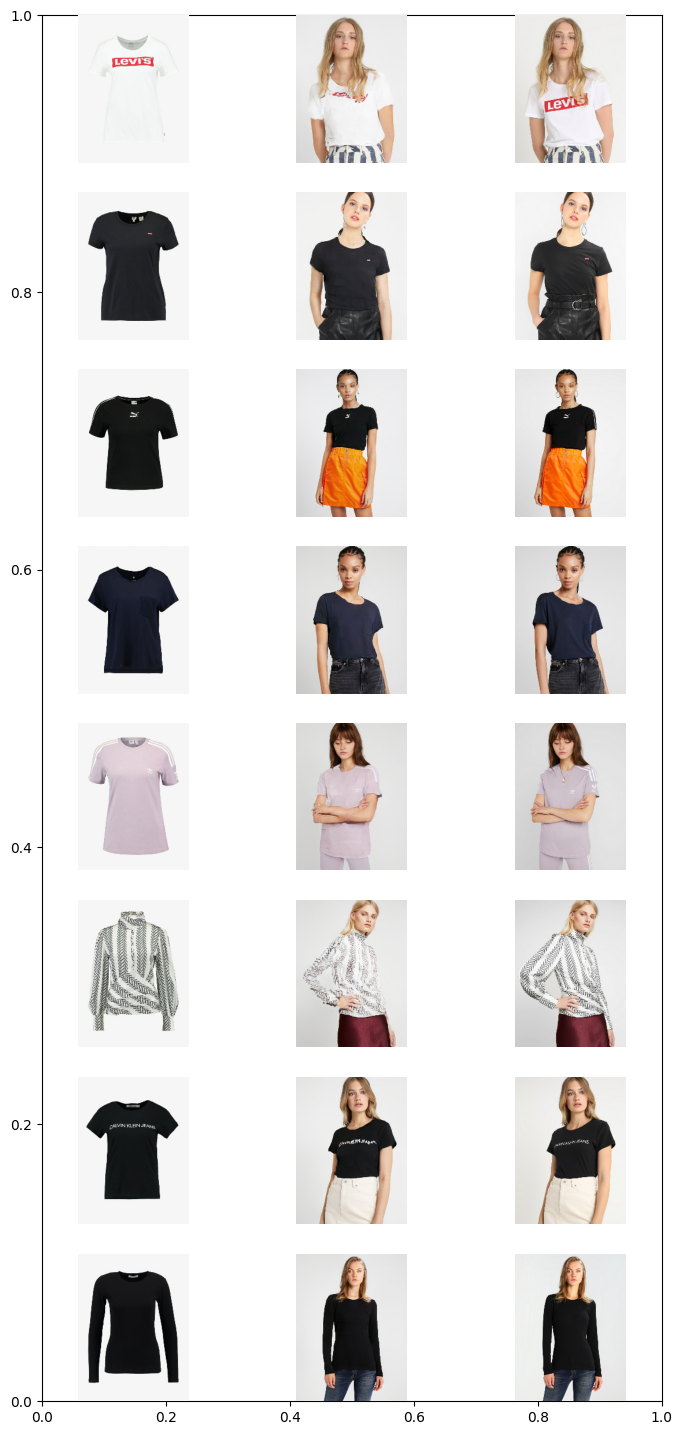

In [45]:
train_sample_preds = tryon_generator(warp_model(train_sample_inputs))

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(train_sample_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(train_sample_preds[(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(train_sample_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

## Validation Set

In [46]:
val_sample = val_datasets.take(1).as_numpy_iterator().next()
val_sample_inputs = val_sample[0]
val_sample_ground_truths = val_sample[1][1]
val_sample_mock_up = val_sample[0][2]

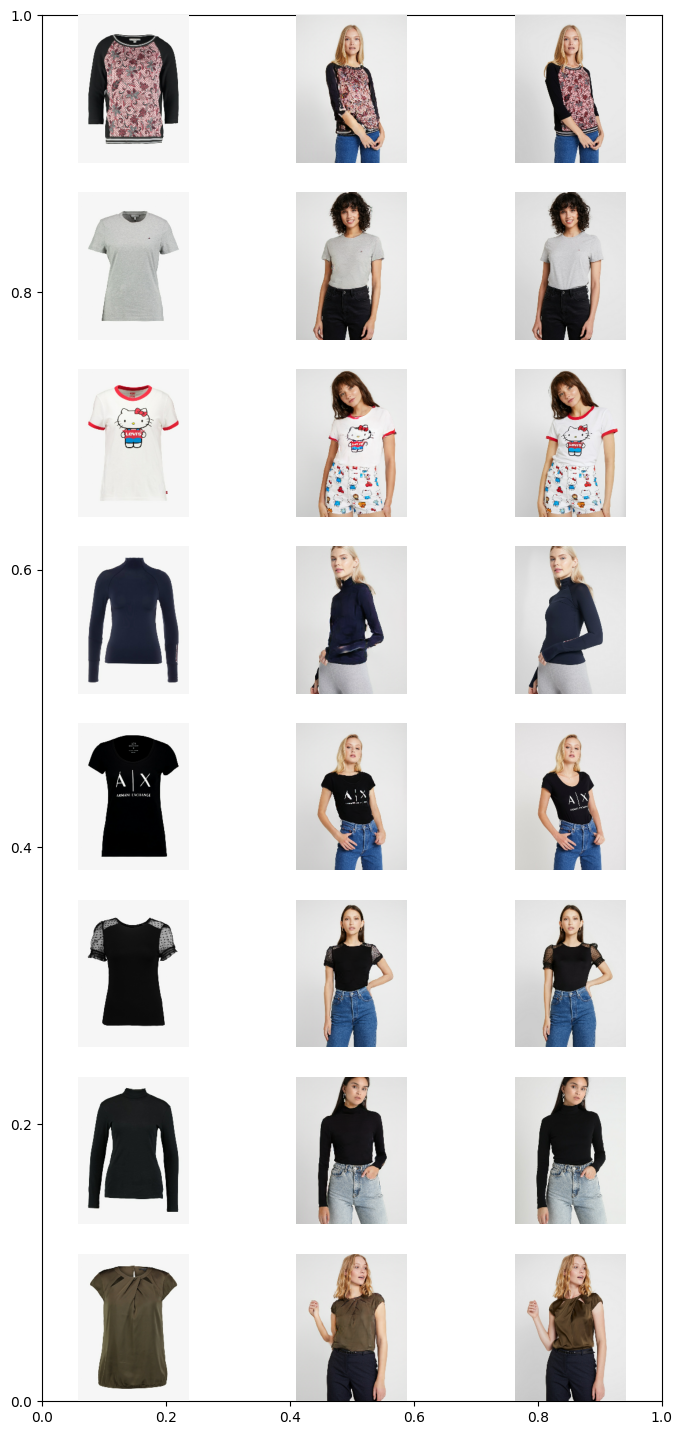

In [93]:
val_sample_preds = tryon_generator(warp_model(val_sample_inputs))

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(val_sample_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(val_sample_preds[(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(val_sample_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

## Testing Set

In [61]:
def test_step(inputs, real_images) :
    fake_images = tryon_generator(warp_model(inputs))

    discriminator_real_output = discriminator((real_images, inputs[0], inputs[1]), training=False)
    discriminator_fake_output = discriminator((fake_images, inputs[0], inputs[1]), training=False)

    test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss = generator_loss(discriminator_fake_output,
                                                                                 fake_images,
                                                                                 real_images)

    test_disc_loss = discriminator_loss(discriminator_real_output, discriminator_fake_output)

    return test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss, test_disc_loss

@tf.function
def distributed_test_step(inputs, real_images):
    test_losses = strategy.run(test_step, args=(inputs, real_images))

    test_per_replica_total_loss, test_per_replica_gan_loss, test_per_replica_vgg_loss, test_per_replica_l1_loss, test_per_replica_discriminator_loss = test_losses

    test_total_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_total_loss, axis=None)
    test_gan_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_gan_loss, axis=None)
    test_vgg_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_vgg_loss, axis=None)
    test_l1_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_l1_loss, axis=None)
    test_disc_loss = strategy.reduce(tf.distribute.ReduceOp.SUM, test_per_replica_discriminator_loss, axis=None)

    return test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss, test_disc_loss

In [82]:
test_total_loss, test_gan_loss, test_vgg_loss, test_l1_loss, test_disc_loss = 0, 0, 0, 0, 0
test_num_batches = 0

for test_inputs, test_real_images in test_dist_data :
    step_test_total_loss, step_test_gan_loss, step_test_vgg_loss, step_test_l1_loss, step_test_discriminator_loss = distributed_test_step(test_inputs, test_real_images[1])

    test_total_loss += step_test_total_loss
    test_gan_loss += step_test_gan_loss
    test_vgg_loss += step_test_vgg_loss
    test_l1_loss += step_test_l1_loss
    test_disc_loss += step_test_discriminator_loss

    test_num_batches += 1

mean_test_total_loss = test_total_loss / test_num_batches
mean_test_gan_loss = test_gan_loss / test_num_batches
mean_test_vgg_loss = test_vgg_loss / test_num_batches
mean_test_l1_loss = test_l1_loss / test_num_batches
mean_test_discriminator_loss = test_disc_loss / test_num_batches

print(f"Testing Loss : {mean_test_total_loss: .2f}\n\
Testing GAN Loss : {mean_test_gan_loss: .2f}\n\
Testing Perceptual Loss : {mean_test_vgg_loss: .2f}\n\
Testing MAE : {mean_test_l1_loss: .2f}\n\
Testing Discriminator Loss : {mean_test_discriminator_loss: .2f}")

Testing Loss :  5.86
Testing GAN Loss :  0.29
Testing Perceptual Loss :  21.31
Testing MAE :  0.04
Testing Discriminator Loss :  0.25


In [54]:
test_sample = test_datasets.take(1).as_numpy_iterator().next()
test_sample_inputs = test_sample[0]
test_sample_ground_truths = test_sample[1][1]
test_sample_mock_up = test_sample[0][2]

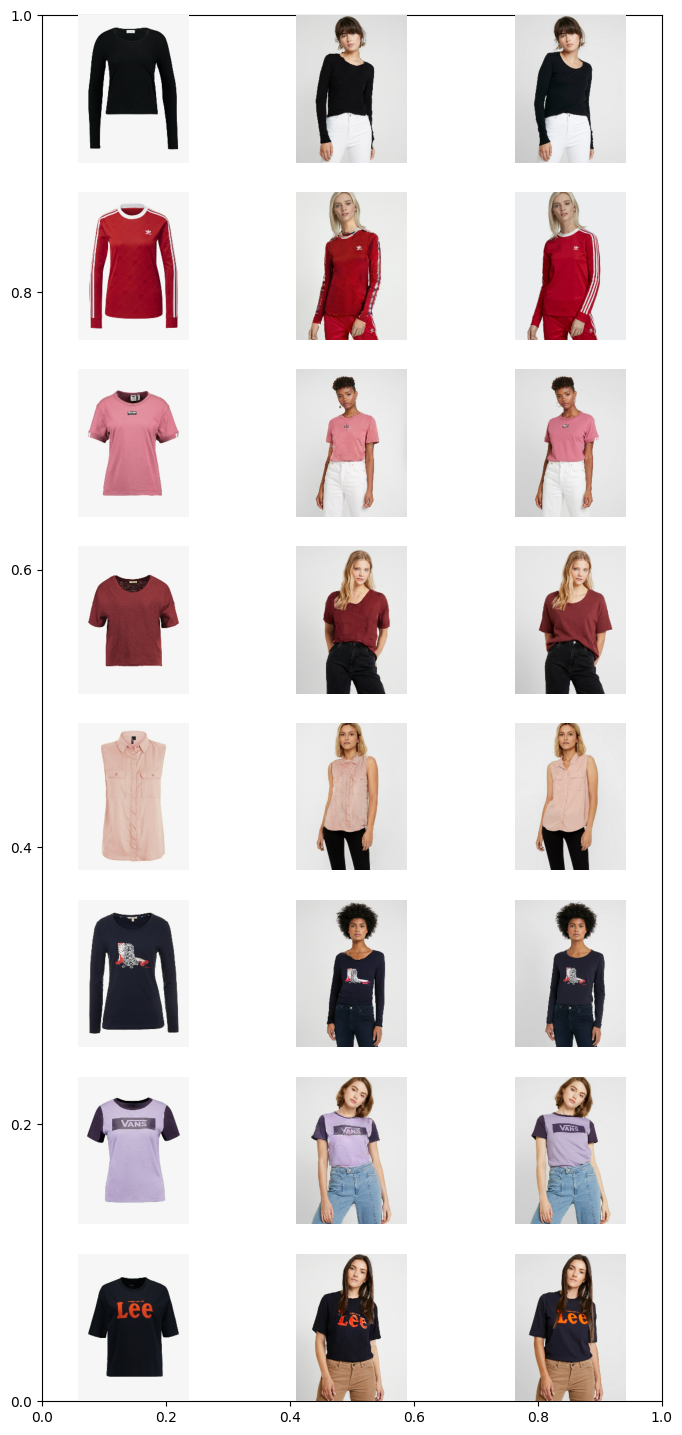

In [83]:
test_sample_preds = tryon_generator(warp_model(test_sample_inputs))

plt.subplots(figsize=(8,18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.imshow(test_sample_mock_up[(i//3), :, :, :])
    plt.axis(False)

    plt.subplot(8, 3, i+2)
    plt.imshow(np.clip(test_sample_preds[(i//3), :, :, :], 0, 1))
    plt.axis(False)

    plt.subplot(8, 3, i+3)
    plt.imshow(test_sample_ground_truths[(i//3), :, :, :])
    plt.axis(False)

plt.show()

## SSIM

In [48]:
def compute_ssim(real_images, fake_images) :
    per_example_ssim = tf.image.ssim(real_images, fake_images, max_val=1.0)
    ssim_score = tf.nn.compute_average_loss(per_example_ssim, global_batch_size=BATCH_SIZE)

    return ssim_score

In [51]:
def ssim_step(inputs, real_images) :
    fake_images = tryon_generator(warp_model(inputs))

    ssim_score = compute_ssim(real_images, fake_images)
    return ssim_score

@tf.function
def distributed_ssim_step(inputs, real_images) :
    ssim_score_per_replica = strategy.run(ssim_step, args=(inputs, real_images))

    total_ssim_score = strategy.reduce(tf.distribute.ReduceOp.SUM, ssim_score_per_replica, axis=None)
    return total_ssim_score

In [84]:
train_ssim_score = 0
val_ssim_score = 0
test_ssim_score = 0
train_num_batches = 0
val_num_batches = 0
test_num_batches = 0

for train_inputs, train_real_images in train_dist_data :
    train_ssim_score += distributed_ssim_step(train_inputs, train_real_images[1])
    train_num_batches += 1

for val_inputs, val_real_images in val_dist_data :
    val_ssim_score += distributed_ssim_step(val_inputs, val_real_images[1])
    val_num_batches += 1

for test_inputs, test_real_images in test_dist_data :
    test_ssim_score += distributed_ssim_step(test_inputs, test_real_images[1])
    test_num_batches += 1

In [85]:
print(f"Mean Training SSIM = {train_ssim_score / train_num_batches : .5f}")
print(f"Mean Validation SSIM = {val_ssim_score / val_num_batches : .5f}")
print(f"Mean Testing SSIM = {test_ssim_score / test_num_batches : .5f}")

Mean Training SSIM =  0.84062
Mean Validation SSIM =  0.74891
Mean Testing SSIM =  0.76073


## Experiment with Different Clothes

In [86]:
with open('/kaggle/input/high-resolution-viton-zalando-dataset/test_pairs.txt') as f:
    pairs = f.read().split('\n')
pairs = [p.replace('.jpg', '') for p in pairs]

In [87]:
random_pairs = np.random.choice(pairs, size=8, replace=False)

In [88]:
random_person = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/image/{filename.split()[0]}.jpg'), cv2.COLOR_BGR2RGB), (192, 256)) for filename in random_pairs], dtype=np.float32)
random_clothes = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth/{filename.split()[1]}.jpg'), cv2.COLOR_BGR2RGB), (192, 256)) for filename in random_pairs], dtype=np.float32)
random_agnostic = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/image-parse-agnostic-v3.2/{filename.split()[0]}.png'), cv2.COLOR_BGR2RGB), (192, 256)) for filename in random_pairs], dtype=np.float32)
random_clothes_segment = np.array([cv2.resize(cv2.cvtColor(cv2.imread(f'/kaggle/input/high-resolution-viton-zalando-dataset/test/cloth-mask/{filename.split()[1]}.jpg'), cv2.COLOR_BGR2RGB), (192, 256)) for filename in random_pairs], dtype=np.float32)

In [89]:
random_person = tf.data.Dataset.from_tensor_slices(random_person).map(lambda x: x / 255)
random_clothes = tf.data.Dataset.from_tensor_slices(random_clothes).map(lambda x: x / 255)
random_agnostic = tf.data.Dataset.from_tensor_slices(random_agnostic)
random_clothes_segment = tf.data.Dataset.from_tensor_slices(random_clothes_segment)

random_clothes_segment = random_clothes_segment.map(threshold_clothes_mask)
random_landmark = random_person.map(apply_mediapipe).map(lambda x: tf.ensure_shape(x, [*IMAGE_SIZE, 1]))
random_person_agnostic = tf.data.Dataset.zip(random_person, random_agnostic).map(lambda x, y: filter_clothes(x, y))

random_inputs = tf.data.Dataset.zip(random_person_agnostic, random_landmark, random_clothes, random_clothes_segment, random_person).batch(8).take(1).as_numpy_iterator().next()

In [91]:
random_outputs = tryon_generator(warp_model(random_inputs[:-1]))

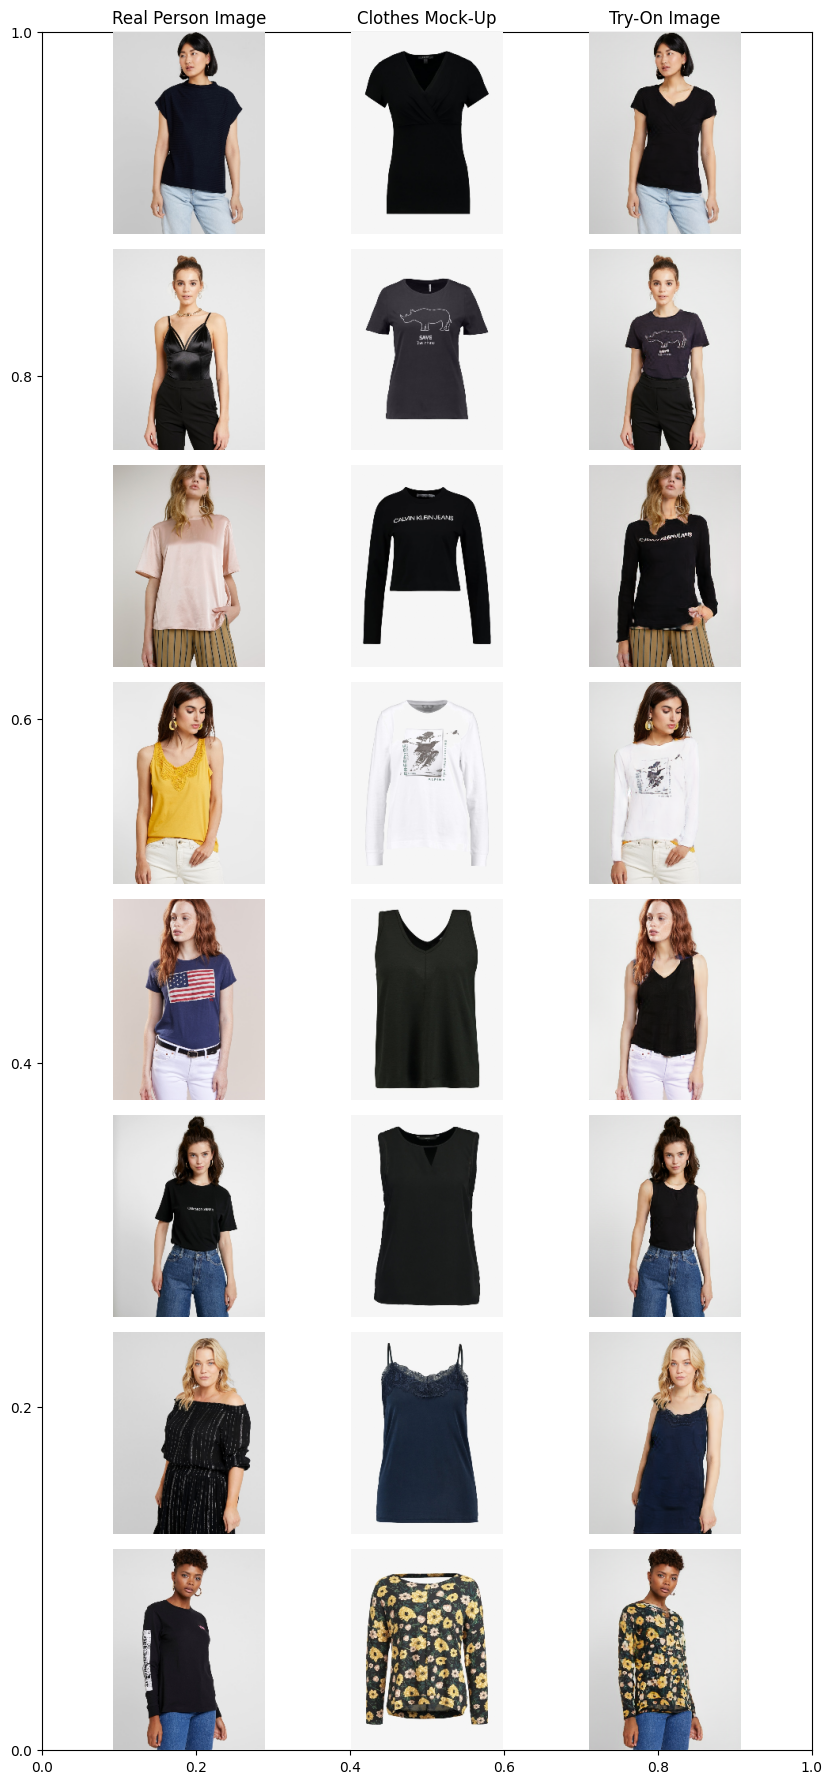

In [92]:
plt.subplots(figsize=(8, 18))
for i in range(0, 24, 3) :
    plt.subplot(8, 3, i+1)
    plt.axis(False)
    plt.imshow(random_inputs[-1][(i//3), :, :, :])
    if i == 0 :
        plt.title("Real Person Image")

    plt.subplot(8, 3, i+2)
    plt.axis(False)
    plt.imshow(np.clip(random_inputs[2][(i//3), :, :, :], 0, 1))
    if i == 0 :
        plt.title("Clothes Mock-Up")

    plt.subplot(8, 3, i+3)
    plt.axis(False)
    plt.imshow(random_outputs[(i//3), :, :, :])
    if i == 0 :
        plt.title("Try-On Image")

plt.tight_layout()
plt.show()